# Проект по Анализу данных "Взаимосвязь ключевых экономических показателей США за последние 10 лет в сфере энергетики"

# Подготовили: Литке Руслан, Родин Владимир.

## Cбор данных и предварительный анализ данных

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts


AEP = pd.read_csv('AEP.csv')
# https://www.kaggle.com/datasets/rprkh15/sp500-stock-prices?resource=download&select=AEP.csv

SO = pd.read_csv('SO.csv')
# https://www.kaggle.com/datasets/rprkh15/sp500-stock-prices?resource=download&select=SO.csv

NEE = pd.read_csv('NEE.csv')
# https://www.kaggle.com/datasets/rprkh15/sp500-stock-prices?resource=download&select=NEE.csv

D = pd.read_csv('D.csv')
# https://www.kaggle.com/datasets/rprkh15/sp500-stock-prices?resource=download&select=D.csv

DUK = pd.read_csv('DUK.csv')
# https://www.kaggle.com/datasets/rprkh15/sp500-stock-prices?resource=download&select=DUK.csv

ES = pd.read_csv('ES.csv')
# https://www.kaggle.com/datasets/rprkh15/sp500-stock-prices?resource=download&select=ES.csv

EXC = pd.read_csv('EXC.csv')
# https://www.kaggle.com/datasets/rprkh15/sp500-stock-prices?resource=download&select=EXC.csv

SRE = pd.read_csv('SRE.csv')
# https://www.kaggle.com/datasets/rprkh15/sp500-stock-prices?resource=download&select=SRE.csv

WEC = pd.read_csv('WEC.csv')
# https://www.kaggle.com/datasets/rprkh15/sp500-stock-prices?resource=download&select=WEC.csv

XEL = pd.read_csv('XEL.csv')
# https://www.kaggle.com/datasets/rprkh15/sp500-stock-prices?resource=download&select=XEL.csv

Oil_brent = pd.read_csv('BrentOilPrices.csv')
# https://www.kaggle.com/datasets/mabusalah/brent-oil-prices

Gold = pd.read_csv('Gold Price.csv')
# https://www.kaggle.com/datasets/nisargchodavadiya/daily-gold-price-20152021-time-series

Gas = pd.read_csv('natural_gas.csv')
# https://www.kaggle.com/datasets/psycon/historical-natural-gas-data-from-2000-to-202204

### Данные взяты из разных датасэтов.

### Давайте рассмотрим, какая информация содержится в  датасэтах компаний.

In [267]:
AEP

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.000000,1.051910,1.027578,1.027578,5800,0.0,0.0
1,1962-01-03,0.000000,1.040680,1.020091,1.025706,10200,0.0,0.0
2,1962-01-04,0.000000,1.027577,1.010732,1.010732,8800,0.0,0.0
3,1962-01-05,0.000000,1.006990,0.977042,0.988272,11400,0.0,0.0
4,1962-01-08,0.000000,0.993887,0.958324,0.980785,17200,0.0,0.0
...,...,...,...,...,...,...,...,...
15231,2022-07-06,93.760002,95.779999,93.269997,94.800003,2574100,0.0,0.0
15232,2022-07-07,95.269997,95.720001,94.410004,94.519997,2604500,0.0,0.0
15233,2022-07-08,94.849998,94.940002,93.830002,94.339996,1979100,0.0,0.0
15234,2022-07-11,94.260002,95.449997,93.800003,95.010002,1699200,0.0,0.0


#### В датасэте комании с тикером AEP столбец "Date" показывает дату, столбец "Open" – цену открытия, столбец "High" – наибольшую цену за день, столбец "Low" – наименьшую цену за день, столбец "Close" – цену закрытия, столбец "Volume" – количество акций данного эмитента, проданное за день, столбец "Dividends" – количество выплаченных дивидендов за день, столбец "Stock Splits" – сплит акций.

#### В датасэтах остальных компаний столбцы аналогичны.

### Теперь рассмотрим, какая информация содержится в датасэте Oil_brent.

In [268]:
Oil_brent

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


#### В датасэте Oil_brent столбец "Date" показывает дату, а столбец "Price" – цену нефти Brent на данный день.

### Теперь рассмотрим датасэт Gold.

In [269]:
Gold

,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-01-02,29975,29678,30050,29678,3140,1.47
2,2014-01-03,29727,30031,30125,29539,3050,-0.83
3,2014-01-04,29279,29279,29279,29279,0,-1.51
4,2014-01-06,29119,29300,29395,29051,24380,-0.55
...,...,...,...,...,...,...,...
2222,2022-08-01,51260,51899,51899,51023,1350,-0.20
2223,2022-08-02,51274,51438,51527,51100,230,0.03
2224,2022-08-03,51225,51250,51375,51137,70,-0.10
2225,2022-08-04,51802,51713,51903,51713,10,1.13


#### В датасэте Gold столбец "Date" показывает дату, столбец "Price" – цену в долларах за унцию, столбец "Open" – цену открытия, столбец "High" – наибольшую цену за день, столбец "Low" – наименьшую цену за день, столбец "Volume" – объем торгов, столбец "Chg%" – изменение цены по отношению к прошлому дню в процентах.

### Настало время рассмотреть датасэт Gas.

In [270]:
Gas

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,2.130,2.200,2.130,2.176,30152,USD
1,2000-01-05,2.180,2.200,2.125,2.168,27946,USD
2,2000-01-06,2.165,2.220,2.135,2.196,29071,USD
3,2000-01-07,2.195,2.230,2.155,2.173,28455,USD
4,2000-01-10,2.180,2.255,2.165,2.216,28916,USD
...,...,...,...,...,...,...,...
5794,2022-08-29,9.670,9.682,9.034,9.353,1200,USD
5795,2022-08-30,9.262,9.300,8.865,9.042,76599,USD
5796,2022-08-31,9.082,9.284,8.814,9.127,86294,USD
5797,2022-09-01,9.133,9.394,9.010,9.262,94244,USD


#### В датасэте Gas столбец "Date" показывает дату, столбец "Open" – цену открытия, столбец "High" – наибольшую цену за день, столбец "Low" – наименьшую цену за день, столбец "Close" – цену закрытия, столбец "Volume" – объем, столбец "Currency" – валюту, в которой подсчитаны предыдущие показатели.

## Следующий шаг – обработка данных

### Получение необходимых значений

In [271]:
AEP['Price_AEP'] = (AEP['High'] +  AEP['Low']) / 2 
D['Price_D'] = (D['High'] +  D['Low']) / 2
DUK['Price_DUK'] = (D['High'] +  D['Low']) / 2
ES['Price_ES'] = (ES['High'] + ES['Low']) / 2
EXC['Price_EXC'] = (EXC['High'] + EXC['Low']) / 2
NEE['Price_NEE'] = (NEE['High'] +  NEE['Low']) / 2
SO['Price_SO'] = (SO['High'] +  SO['Low']) / 2 
SRE['Price_SRE'] = (SRE['High'] + SRE['Low']) / 2
WEC['Price_WEC'] = (WEC['High'] + WEC['Low']) / 2
XEL['Price_XEL'] = (XEL['High'] + XEL['Low']) / 2

#### Здесь мы находим цену акций, с которой будем работать дальше. Для этого берём столбец "High" (наибольшую цену за день) для каждой акции, складываем со столбцом "Low" (наименьшей ценой акции за день) и делим на 2, чтобы найти среднее значение. В итоге получаем новый столбец "Price_Тикер_компании" для каждой комании. 

In [272]:
AEP

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Price_AEP
0,1962-01-02,0.000000,1.051910,1.027578,1.027578,5800,0.0,0.0,1.039744
1,1962-01-03,0.000000,1.040680,1.020091,1.025706,10200,0.0,0.0,1.030385
2,1962-01-04,0.000000,1.027577,1.010732,1.010732,8800,0.0,0.0,1.019155
3,1962-01-05,0.000000,1.006990,0.977042,0.988272,11400,0.0,0.0,0.992016
4,1962-01-08,0.000000,0.993887,0.958324,0.980785,17200,0.0,0.0,0.976105
...,...,...,...,...,...,...,...,...,...
15231,2022-07-06,93.760002,95.779999,93.269997,94.800003,2574100,0.0,0.0,94.524998
15232,2022-07-07,95.269997,95.720001,94.410004,94.519997,2604500,0.0,0.0,95.065002
15233,2022-07-08,94.849998,94.940002,93.830002,94.339996,1979100,0.0,0.0,94.385002
15234,2022-07-11,94.260002,95.449997,93.800003,95.010002,1699200,0.0,0.0,94.625000


#### В качестве примера можно посмотреть на датасэт выше для AEP.

In [273]:
Gold['Price_Gold'] = (Gold['High'] + Gold['Low']) / 2
Gas['Price_Gas'] = (Gas['High'] + Gas['Low']) / 2

#### Аналогичную операцию проводим для датасэтов Gold и Gas.

In [274]:
Oil_brent = Oil_brent.rename(columns={'Price': 'Price_Oil_brent'})
Oil_brent

,Date,Price_Oil_brent
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


#### Для датасэта Oil_brent переименуем столбец "Price" в "Price_Oil_brent" просто для одинакого формата названия колонок в будущем датасэте.

In [275]:
AEP['Date'] = pd.to_datetime(AEP['Date'])
D['Date'] = pd.to_datetime(D['Date'])
DUK['Date'] = pd.to_datetime(DUK['Date'])
ES['Date'] = pd.to_datetime(ES['Date'])
EXC['Date'] = pd.to_datetime(EXC['Date'])
NEE['Date'] = pd.to_datetime(NEE['Date'])
SO['Date'] = pd.to_datetime(SO['Date'])
SRE['Date'] = pd.to_datetime(SRE['Date'])
WEC['Date'] = pd.to_datetime(WEC['Date'])
XEL['Date'] = pd.to_datetime(XEL['Date'])

Gold['Date'] = pd.to_datetime(Gold['Date'])
Gas['Date'] = pd.to_datetime(Gas['Date'])
Oil_brent['Date'] = pd.to_datetime(Oil_brent['Date'])

#### Прменяем pd.to_datetime() для дальнейшего удобства работы с датасэтами.

In [276]:
df = AEP[['Date','Price_AEP']].merge(SO[['Date','Price_SO']], left_on='Date', right_on='Date', suffixes=('', ''))
df = df.merge(NEE[['Date','Price_NEE']], left_on='Date', right_on='Date', suffixes=('', ''))
df = df.merge(D[['Date','Price_D']], left_on='Date', right_on='Date', suffixes=('', ''))
df = df.merge(DUK[['Date','Price_DUK']], left_on='Date', right_on='Date', suffixes=('', ''))
df = df.merge(ES[['Date','Price_ES']], left_on='Date', right_on='Date', suffixes=('', ''))
df = df.merge(EXC[['Date','Price_EXC']], left_on='Date', right_on='Date', suffixes=('', ''))
df = df.merge(SRE[['Date','Price_SRE']], left_on='Date', right_on='Date', suffixes=('', ''))
df = df.merge(WEC[['Date','Price_WEC']], left_on='Date', right_on='Date', suffixes=('', ''))
df = df.merge(XEL[['Date','Price_XEL']], left_on='Date', right_on='Date', suffixes=('', ''))

df = df.merge(Oil_brent, left_on='Date', right_on='Date', suffixes=('', ''))
df = df.merge(Gold[['Date','Price_Gold']], left_on='Date', right_on='Date', suffixes=('', ''))
df = df.merge(Gas[['Date','Price_Gas']], left_on='Date', right_on='Date', suffixes=('', ''))

df.set_index('Date', inplace=True)

#### Здесь мы создали новую таблицу df, в которую внесли найденные выше цены акций компаний и цены на газ, золото и нефть Brent посредством merge(). После этого применили set_index('Date', inplace=True), для того чтобы в качестве индекса поставить 'Date'.

In [277]:
df['Price_index'] = np.mean(df[['Price_AEP', 'Price_SO', 'Price_NEE', 'Price_D', 'Price_DUK', 'Price_ES', 'Price_EXC', 'Price_SRE', 'Price_WEC', 'Price_XEL']], axis = 1)

#### Кроме того, создаем столбец индикативной цены - средняя цена за день. Данный показатель можно трактовать как индекс цены энергетических компаний.

In [278]:
df

,Price_AEP,Price_SO,Price_NEE,Price_D,Price_DUK,Price_ES,Price_EXC,Price_SRE,Price_WEC,Price_XEL,Price_Oil_brent,Price_Gold,Price_Gas,Price_index
Date,,,,,,,,,,,,,,
2014-01-02,34.545357,27.773454,17.039079,45.880430,45.880430,32.344354,14.455872,68.725165,31.288804,21.214824,107.94,29864.0,4.2720,33.914777
2014-01-03,34.218829,27.538952,16.939679,45.497147,45.497147,31.975227,14.107282,68.516443,31.014234,21.054099,106.57,29832.0,4.2980,33.635904
2014-01-06,34.241093,27.518563,16.932648,45.515038,45.515038,31.882951,14.104643,68.017836,30.804488,21.004362,106.71,29223.0,4.3225,33.553666
2014-01-07,34.341276,27.596733,17.052135,46.009381,46.009381,32.136717,14.178583,69.478911,31.040918,21.142121,107.01,29053.5,4.3460,33.898616
2014-01-08,34.270772,27.555948,17.092295,46.356845,46.356845,32.036756,14.220839,69.652853,31.143891,21.237786,107.42,28924.5,4.2725,33.992483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,94.524998,71.430000,79.399998,80.115002,80.115002,84.005001,44.125000,147.690002,100.509998,70.610001,108.54,51055.0,5.5585,85.252500
2022-07-07,95.065002,71.595001,80.195000,80.170002,80.170002,84.165001,44.740000,148.240005,100.400002,70.445000,113.40,50758.0,5.9345,85.518501
2022-07-08,94.385002,71.174999,79.920002,79.509998,79.509998,83.780003,44.355000,147.214996,99.590000,69.474998,113.95,50737.5,6.1585,84.891500


#### Выше показано, как выглядит получившаяся таблица.

### Проверка на пропуски

In [279]:
df.isnull().sum()

Price_AEP          0
Price_SO           0
Price_NEE          0
Price_D            0
Price_DUK          0
Price_ES           0
Price_EXC          0
Price_SRE          0
Price_WEC          0
Price_XEL          0
Price_Oil_brent    0
Price_Gold         0
Price_Gas          0
Price_index        0
dtype: int64

#### В итоге в нашей таблице df нет пропусков. Значит, можем работать с ней дальше.

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2104 entries, 2014-01-02 to 2022-07-12
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price_AEP        2104 non-null   float64
 1   Price_SO         2104 non-null   float64
 2   Price_NEE        2104 non-null   float64
 3   Price_D          2104 non-null   float64
 4   Price_DUK        2104 non-null   float64
 5   Price_ES         2104 non-null   float64
 6   Price_EXC        2104 non-null   float64
 7   Price_SRE        2104 non-null   float64
 8   Price_WEC        2104 non-null   float64
 9   Price_XEL        2104 non-null   float64
 10  Price_Oil_brent  2104 non-null   float64
 11  Price_Gold       2104 non-null   float64
 12  Price_Gas        2104 non-null   float64
 13  Price_index      2104 non-null   float64
dtypes: float64(14)
memory usage: 246.6 KB


#### Каждый столбец имеет формат "float64" и, следовательно, в нем нет элементов типа "str".

### Приведение данных в единый формат

#### Переменные "Price_Gold" и "Price_Gas" попадают в диапазон от 20К до 50К и от 3 до 10 соответсвенно. Это отличается от диапазона цен рассматриваеимых акций. Приведем эти переменные к значениям до 1000. Теперь "Price_Gold" - цена за 0.01 унцию, а "Price_Gas"- цена за 100 кубов газа.

In [281]:
df['Price_Gold'] = df['Price_Gold'] / 100
df['Price_Gas'] = df['Price_Gas'] * 100 

#### Рассмотрим столбы "Price_Gold" и "Price_Gas".

In [282]:
df[["Price_Gold", "Price_Gas"]]

,Price_Gold,Price_Gas
Date,,
2014-01-02,298.640,427.20
2014-01-03,298.320,429.80
2014-01-06,292.230,432.25
2014-01-07,290.535,434.60
2014-01-08,289.245,427.25
...,...,...
2022-07-06,510.550,555.85
2022-07-07,507.580,593.45
2022-07-08,507.375,615.85


## Следующий шаг – визуализация

### Рассмотрим взаимосвязь цен нефти и индикативной цены.

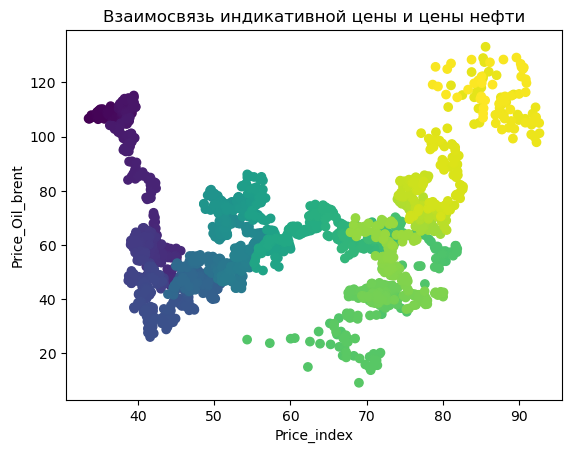

In [283]:
plt.scatter(df['Price_index'], df['Price_Oil_brent'], c=df.index)
plt.xlabel('Price_index')
plt.ylabel('Price_Oil_brent')
plt.title('Взаимосвязь индикативной цены и цены нефти')
plt.show()

#### Градиент показывает дату – чем светлее, тем ближе к дате окончания наблюдений. Никаких явных закономерностей не наблюдается. Однако можно заметить некоторые тенденции в ограниченных промежутках времени. Кажется, что есть какая-то тенденция в 2015 году. Рассмотрим 2015 год поближе.

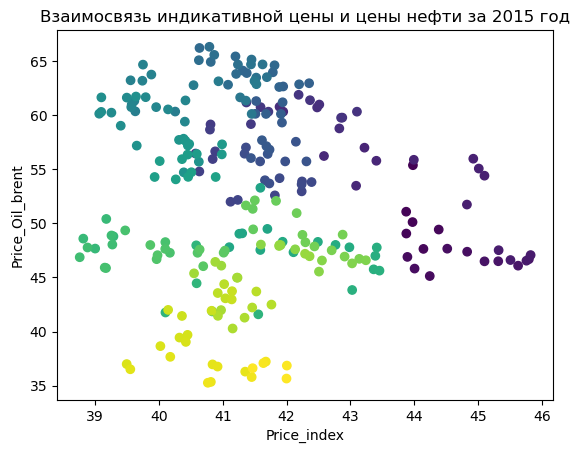

In [284]:
period = (df.index < '01.01.2016') & (df.index > '01.01.2015')
plt.scatter(df['Price_index'][period], df['Price_Oil_brent'][period], c=df.index[period])
plt.xlabel('Price_index')
plt.ylabel('Price_Oil_brent')
plt.title('Взаимосвязь индикативной цены и цены нефти за 2015 год')
plt.show()

#### Для 2015 года взаимосвязь между исследуемыми значениями также явно не присутствует.

### Сделаем аналогичную визуализацию для индикативных цены и цены газа.

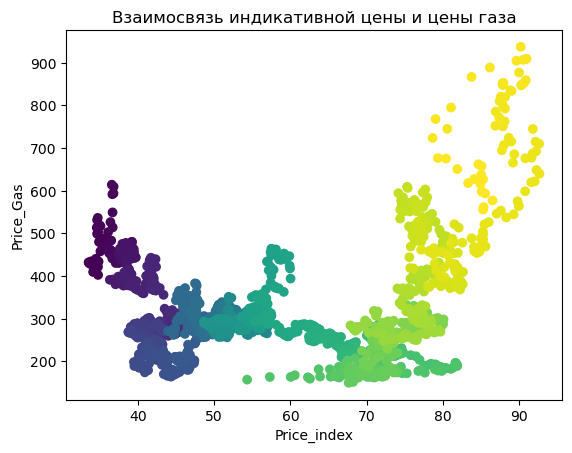

In [285]:
plt.scatter(df['Price_index'], df['Price_Gas'], c=df.index)
plt.xlabel('Price_index')
plt.ylabel('Price_Gas')
plt.title('Взаимосвязь индикативной цены и цены газа')
plt.show()

#### Визуализация взаимосвзязи индикативной цены и цены газа не показывает явных закономерностей между  "Price_index" и "Price_Gas".

### Проверим всё тот же 2015 год для подтвержедния гипотезы об отсутствии явной взаимосвязи.

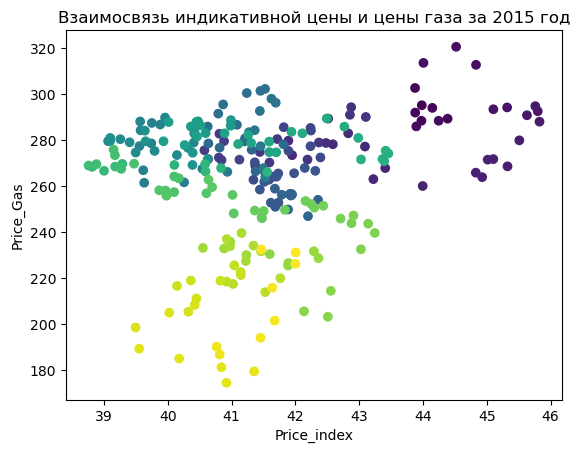

In [286]:
period = (df.index < '01.01.2016') & (df.index > '01.01.2015')
plt.scatter(df['Price_index'][period], df['Price_Gas'][period], c=df.index[period])
plt.xlabel('Price_index')
plt.ylabel('Price_Gas')
plt.title('Взаимосвязь индикативной цены и цены газа за 2015 год')
plt.show()

#### Как и ожидалось, для 2015 года взаимосвязь между исследуемыми значениями также явно не присутствует.

## Для данных цен ничего обнаружить не удалось, рассмотрим  изменения цен за день. Создадим новую таблицу для дальнейшего анализа.

In [287]:
df_diff = df.diff()

In [288]:
df_diff.drop(index='2014-01-02',axis=0, inplace=True)

#### Таблица df_diff, созданная посредством df.diff(), содержит всё те же столбцы, однако строки отличаются от таблицы df. В строках таблицы df_diff показано измение цен акций компаний и цен нефти Brent, золота и газа в абсолюных значениях.

#### В итоге наша таблица df_diff выгдядит так: 

In [289]:
df_diff

,Price_AEP,Price_SO,Price_NEE,Price_D,Price_DUK,Price_ES,Price_EXC,Price_SRE,Price_WEC,Price_XEL,Price_Oil_brent,Price_Gold,Price_Gas,Price_index
Date,,,,,,,,,,,,,,
2014-01-03,-0.326528,-0.234502,-0.099400,-0.383283,-0.383283,-0.369127,-0.348589,-0.208722,-0.274570,-0.160726,-1.37,-0.320,2.60,-0.278873
2014-01-06,0.022264,-0.020389,-0.007031,0.017891,0.017891,-0.092275,-0.002639,-0.498608,-0.209746,-0.049737,0.14,-6.090,2.45,-0.082238
2014-01-07,0.100183,0.078169,0.119487,0.494343,0.494343,0.253765,0.073940,1.461075,0.236431,0.137759,0.30,-1.695,2.35,0.344950
2014-01-08,-0.070504,-0.040785,0.040161,0.347464,0.347464,-0.099960,0.042256,0.173942,0.102972,0.095665,0.41,-1.290,-7.35,0.093867
2014-01-09,-0.018552,-0.050978,0.090375,0.784509,0.784509,0.038440,0.013201,-0.030902,-0.106788,0.015306,0.07,0.345,-17.60,0.151912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,-0.695004,-0.009998,0.259998,0.410004,0.410004,-0.424999,-0.200001,-0.476760,0.389996,-0.279999,-1.95,-10.130,-5.75,-0.061676
2022-07-07,0.540005,0.165001,0.795002,0.055000,0.055000,0.160000,0.615000,0.550003,-0.109997,-0.165001,4.86,-2.970,37.60,0.266001
2022-07-08,-0.680000,-0.420002,-0.274998,-0.660004,-0.660004,-0.384998,-0.385000,-1.025009,-0.810001,-0.970001,0.55,-0.205,22.40,-0.627002


### Работаем с таблицей df_diff

#### Создадим графики, отображающие попарно то, как значения "Price_Oil_brent", "Price_Gas" и "Price_index" изменялись:

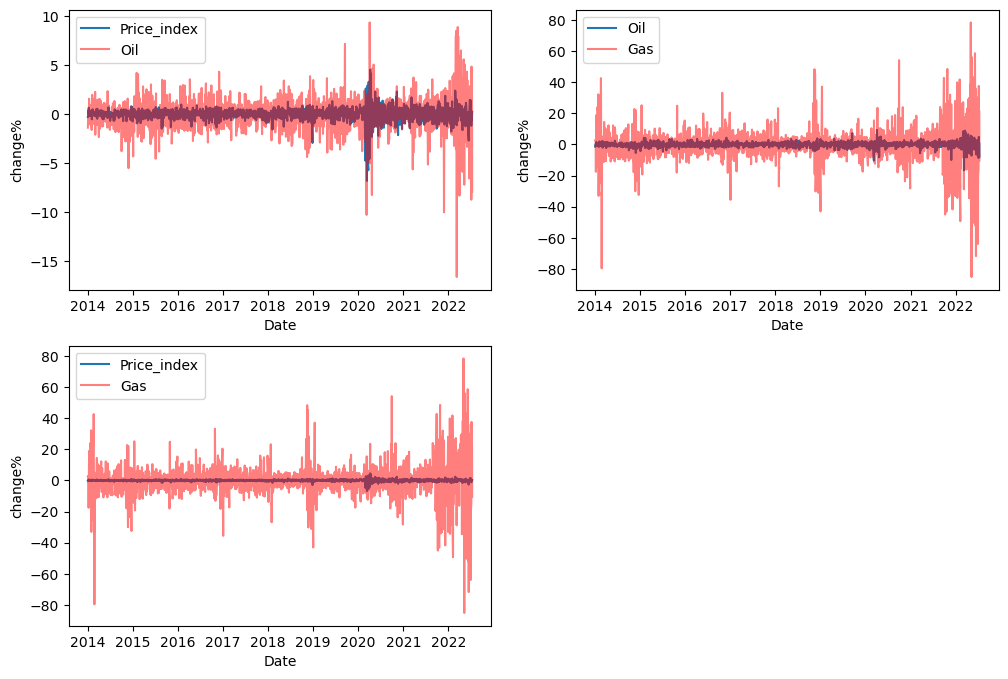

In [290]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0, 0].plot(df_diff['Price_index'], label='Price_index')
axes[0, 0].plot(df_diff['Price_Oil_brent'], c='red', alpha=0.5, label='Oil')
axes[0, 0].legend()
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('change%')

axes[0, 1].plot(df_diff['Price_Oil_brent'], label='Oil')
axes[0, 1].plot(df_diff['Price_Gas'], c='red', alpha=0.5, label='Gas')
axes[0, 1].legend()
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('change%')

axes[1, 0].plot(df_diff['Price_index'], label='Price_index')
axes[1, 0].plot(df_diff['Price_Gas'], c='red', alpha=0.5, label='Gas')
axes[1, 0].legend()
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('change%')

fig.delaxes(axes[1, 1])
plt.show()

#### Заметна высокая волатильность цены газа. Кроме того, заметна некоторая взаимосвязь между изменением цены нефти и индикативной цены после 2020 года.

### Какая у них была корреляция в это время? А до 2020? Давайте проверим.

In [291]:
cond = df.index > '2020'
np.corrcoef(df['Price_Gas'][cond], df['Price_index'][cond])[0][1]

0.7692657052441506

#### Значение корреляции между изменением цены нефти и изменением индикативной цены после 2020 года примерно равно 0.77 (округлено до сотых). Данное значение присуще средней прямой корреляции. Можно сказать, что между 'Price_index' и 'Price_Oil_brent' есть некоторая взаимосвязь.

In [292]:
cond = df.index < '2020'
np.corrcoef(df['Price_Gas'][cond], df['Price_index'][cond])[0][1]

-0.42284710253261015

#### Значение корреляции между изменением цены нефти и изменением индикативной цены до 2020 года примерно равно -0.42 (округлено до сотых). Данное значение находится на грани между слабой обратной и средней обратной корреляции. Следовательно, до 2020 года говорить о тесной взаимосвязи между Price_index' и 'Price_Oil_brent' не приходится.

#### Корреляция стала крайне низкой.

### Рассмотрим корреляцию между всеми параметрами за год, рассчитываемую ежедневно. 

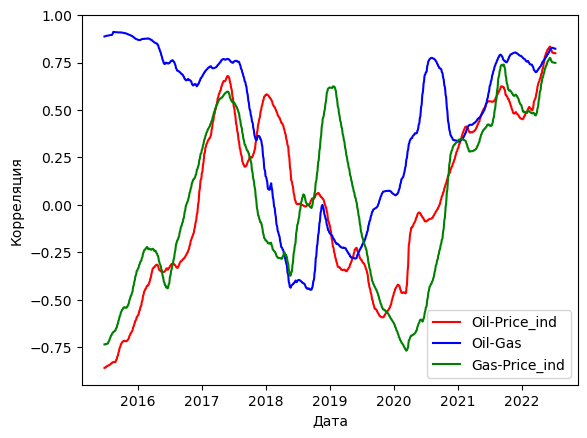

In [293]:
corr_coefs = {'Oil-Price_ind':[], 'Oil-Gas':[], 'Gas-Price_ind':[]}
for i in range(0, len(df.index) - 365):
    cond = (df.index[i] < df.index) & (df.index < df.index[i + 365])
    corr_coefs['Oil-Price_ind'].append(np.corrcoef(df['Price_index'][cond], df['Price_Oil_brent'][cond])[0][1])
    corr_coefs['Oil-Gas'].append(np.corrcoef(df['Price_Oil_brent'][cond], df['Price_Gas'][cond])[0][1])
    corr_coefs['Gas-Price_ind'].append(np.corrcoef(df['Price_Gas'][cond], df['Price_index'][cond])[0][1])
plt.plot(df.index[365:], corr_coefs['Oil-Price_ind'], c='red', label='Oil-Price_ind')
plt.plot(df.index[365:], corr_coefs['Oil-Gas'], c='blue', label='Oil-Gas')
plt.plot(df.index[365:], corr_coefs['Gas-Price_ind'], c='green', label='Gas-Price_ind')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Корреляция')
plt.show()

#### Можно заметить, что корреляция у всех активов не постоянна. Кроме того, видно, что в 2018–2020 корреляция пары "Gas-Price_ind" выросла, в то время как "Oil-Price_ind" и "Oil-Gas" снизилась.

### Интересное наблюдение!

#### Если "Gas-Price_ind" сдвинуть влево примерно на 1,5–2 года, а "Oil-Price_ind" – влево примерно на 1 год, то графики корреляций будут "идти по одной траектории" с подозрительной схожестью "марштрутов". Можно сделать предположение, что корреляция "Oil-Price_ind" имеет некоторые предсказательные свойства (Г1).

### Рассмотрим, как в это время себя вела цена золота – "защитного актива".

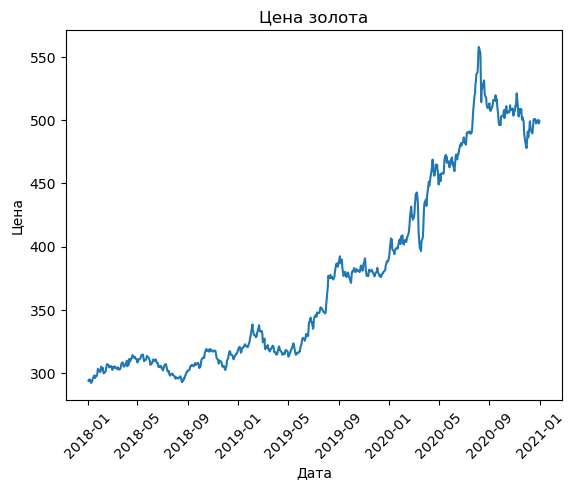

In [294]:
plt.plot(df['Price_Gold'][(df.index >'2018') & (df.index < '2021')])
plt.title('Цена золота')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.xticks(rotation=45)
plt.show()

#### Цена золота все время росла. А как золото коррелирует с другими активами?

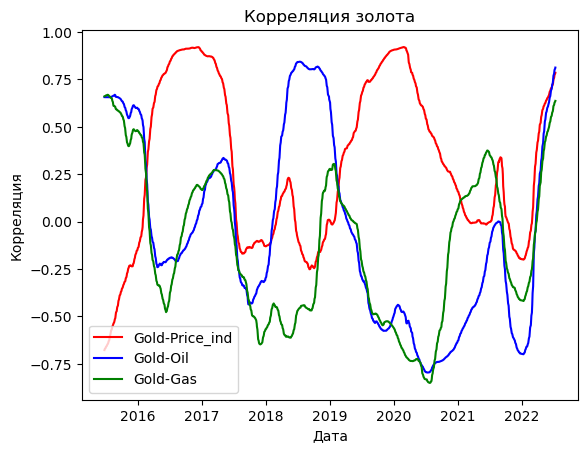

In [295]:
corr_coefs_gold = {'Gold-Price_ind':[], 'Gold-Oil':[], 'Gold-Gas':[]}
for i in range(0, len(df.index) - 365):
    cond = (df.index[i] < df.index) & (df.index < df.index[i + 365])
    corr_coefs_gold['Gold-Price_ind'].append(np.corrcoef(df['Price_Gold'][cond], df['Price_index'][cond])[0][1])
    corr_coefs_gold['Gold-Oil'].append(np.corrcoef(df['Price_Gold'][cond], df['Price_Oil_brent'][cond])[0][1])
    corr_coefs_gold['Gold-Gas'].append(np.corrcoef(df['Price_Gold'][cond], df['Price_Gas'][cond])[0][1])
plt.plot(df.index[365:], corr_coefs_gold['Gold-Price_ind'], c='red', label='Gold-Price_ind')
plt.plot(df.index[365:], corr_coefs_gold['Gold-Oil'], c='blue', label='Gold-Oil')
plt.plot(df.index[365:], corr_coefs_gold['Gold-Gas'], c='green', label='Gold-Gas')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Корреляция')
plt.title('Корреляция золота')
plt.show()

#### Золото в основном положительно коррелирует с ценовым индикатором, что странно, так как оно по идеи должно быть контрциклично. Кроме того, интересно, что повышенная корреляция золота и ценового индикатора особенно заметна в то время, когда корреляция золота и газа снижается.

###  Рассмотрим подробнее первый пункт из предложения выше:

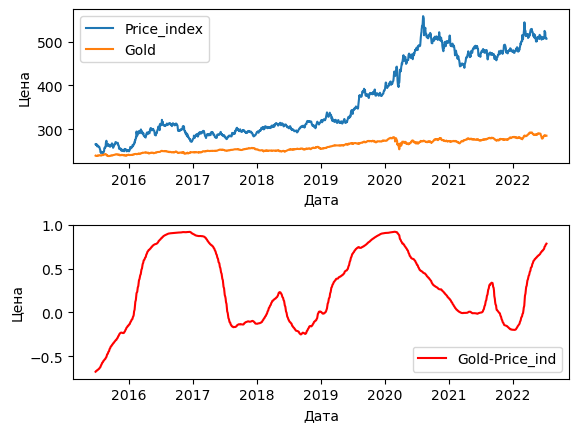

In [296]:
plt.subplot(2,1,1)
plt.plot(df.index[365:], df['Price_Gold'][365:], label='Price_index')
plt.plot(df.index[365:], df['Price_index'][365:] + 200, label='Gold')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index[365:], corr_coefs_gold['Gold-Price_ind'], c='red', label='Gold-Price_ind')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()

#### Повышенная корреляция заметна в 2017 и в 2020, когда оба индекса падали. Однако все остальное время корреляция держится в диапозоне нуля. Это странно, так как считается, что в периоды кризисов золото должно расти. Давайте проведем простую симуляцию. Будем покупать и продавать золото в те дни, когда индикативная цена снижается.

In [297]:
p = df_diff['Price_Gold'][df_diff['Price_index'] < 0].sum()
print(f'Суммарный упадок цены золота, когда индикативная цена падала: {p}')

Суммарный упадок цены золота, когда индикативная цена падала: -111.6


In [298]:
q = df_diff['Price_index'][df_diff['Price_index'] < 0].sum()
print(f'Суммарный упадок индикативной цены: {q}')

Суммарный упадок индикативной цены: -383.235984136956


#### Следовательно, можно сделать вывод, что приобретение золота, как защитного актива, позволит в лучшем случае уменьшить потери при падении цен акций, но точно не заработать – аналог голубых фишек с меньшей доходностью.

### Рассмотрим взаимосвязь цен отдельных акций:

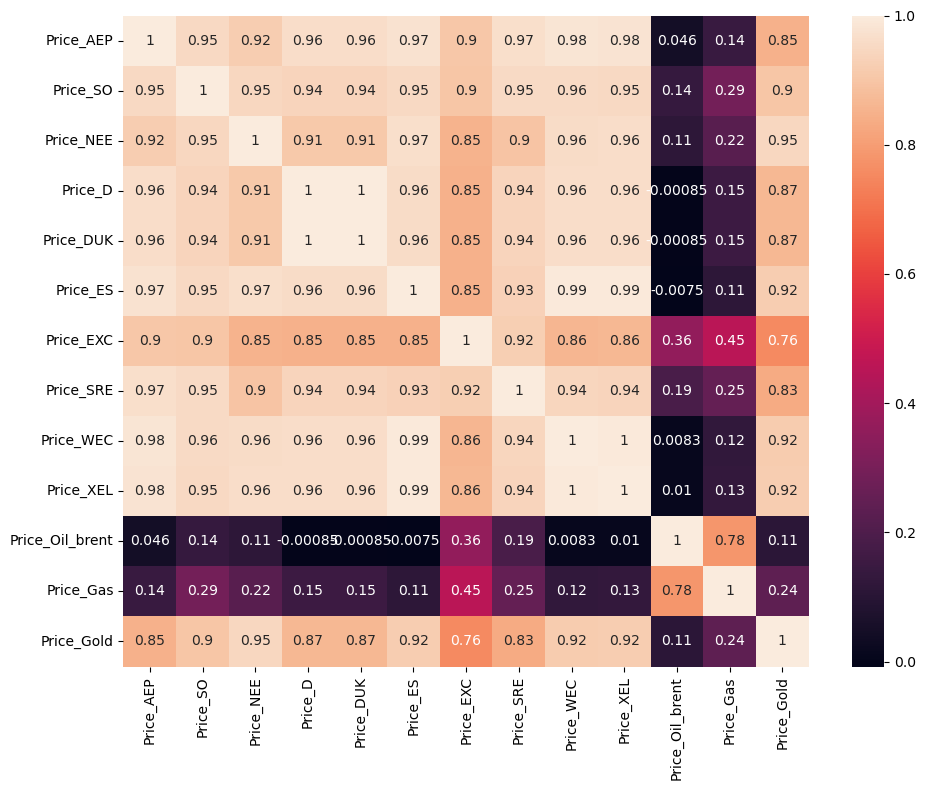

In [299]:
securities = ['Price_AEP', 'Price_SO', 'Price_NEE', 'Price_D', 'Price_DUK', 'Price_ES', 'Price_EXC', 'Price_SRE', 'Price_WEC', 'Price_XEL', 'Price_Oil_brent', 'Price_Gas', 'Price_Gold']
plt.figure(figsize=(10, 8))  
sns.heatmap(df[securities].corr(), annot=True)
plt.tight_layout()
plt.show()

#### Интереснее всего выглядит корреляция между "Price_DUK" и "Price_D". Рассмотрим цены этих бумаг.

In [300]:
df[['Price_D', 'Price_DUK']]

,Price_D,Price_DUK
Date,,
2014-01-02,45.880430,45.880430
2014-01-03,45.497147,45.497147
2014-01-06,45.515038,45.515038
2014-01-07,46.009381,46.009381
2014-01-08,46.356845,46.356845
...,...,...
2022-07-06,80.115002,80.115002
2022-07-07,80.170002,80.170002
2022-07-08,79.509998,79.509998


#### Цены одинаковые, а в датасэте они разные – делаем вывод, что автор просто допустил ошибку. Уберем из датасэта переменную "Price_D". P.S это точно две разные компании. D: https://www.cnbc.com/quotes/D , DUK: https://www.marketwatch.com/investing/stock/duk

In [301]:
df.drop('Price_D', axis=1, inplace = True)
df_diff.drop('Price_D', axis=1, inplace = True)
df

,Price_AEP,Price_SO,Price_NEE,Price_DUK,Price_ES,Price_EXC,Price_SRE,Price_WEC,Price_XEL,Price_Oil_brent,Price_Gold,Price_Gas,Price_index
Date,,,,,,,,,,,,,
2014-01-02,34.545357,27.773454,17.039079,45.880430,32.344354,14.455872,68.725165,31.288804,21.214824,107.94,298.640,427.20,33.914777
2014-01-03,34.218829,27.538952,16.939679,45.497147,31.975227,14.107282,68.516443,31.014234,21.054099,106.57,298.320,429.80,33.635904
2014-01-06,34.241093,27.518563,16.932648,45.515038,31.882951,14.104643,68.017836,30.804488,21.004362,106.71,292.230,432.25,33.553666
2014-01-07,34.341276,27.596733,17.052135,46.009381,32.136717,14.178583,69.478911,31.040918,21.142121,107.01,290.535,434.60,33.898616
2014-01-08,34.270772,27.555948,17.092295,46.356845,32.036756,14.220839,69.652853,31.143891,21.237786,107.42,289.245,427.25,33.992483
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,94.524998,71.430000,79.399998,80.115002,84.005001,44.125000,147.690002,100.509998,70.610001,108.54,510.550,555.85,85.252500
2022-07-07,95.065002,71.595001,80.195000,80.170002,84.165001,44.740000,148.240005,100.400002,70.445000,113.40,507.580,593.45,85.518501
2022-07-08,94.385002,71.174999,79.920002,79.509998,83.780003,44.355000,147.214996,99.590000,69.474998,113.95,507.375,615.85,84.891500


#### Заметна корреляция цен бумаг друг с другом на уровне 0.7–0.9. Разобьем данные на группы по годам: 2014–2018 и 2019–2022, так как ранее наблюдали особенности в этих двух периодах.

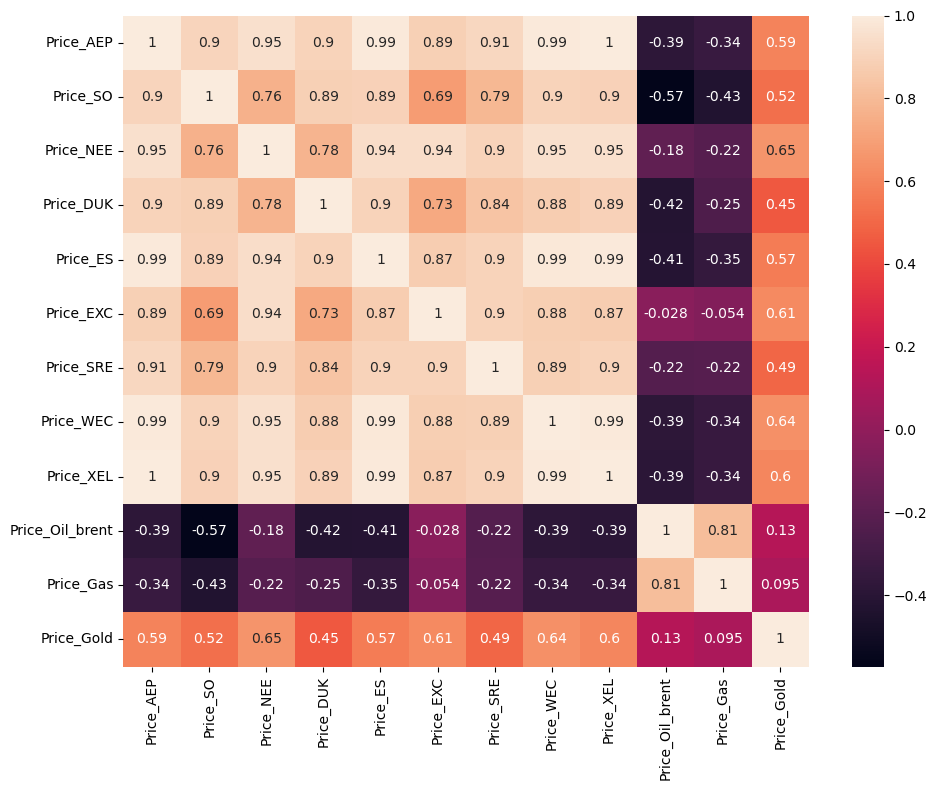

In [302]:
securities = ['Price_AEP', 'Price_SO', 'Price_NEE', 'Price_DUK', 'Price_ES', 'Price_EXC', 'Price_SRE', 'Price_WEC', 'Price_XEL', 'Price_Oil_brent', 'Price_Gas', 'Price_Gold']
cond = (df.index <= '2019')
plt.figure(figsize=(10, 8))
sns.heatmap(df[securities][cond].corr(), annot=True)
plt.tight_layout()
plt.show()

#### В 2014–2019 годах матрица выглядит похожим образом.

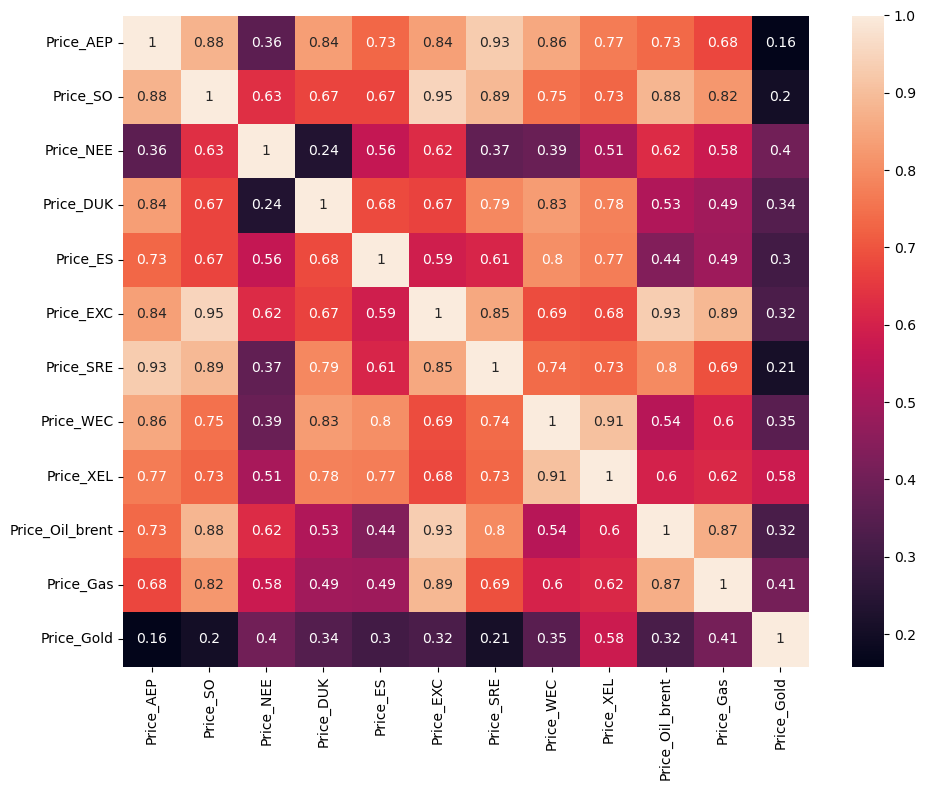

In [303]:
cond = (df.index > '2020')
plt.figure(figsize=(10, 8))
sns.heatmap(df[securities][cond].corr(), annot=True)
plt.tight_layout()
plt.show()

#### После 2019 года взаимосвязь цен бумаг меняется кардинальным образом – её коэффциенты в некотором смысле начинаются выглядеть случайно. 

#### Вернемся к тепловой карте, но рассмотирим, как она изменилась в абсолютном значении в 2019 году. 

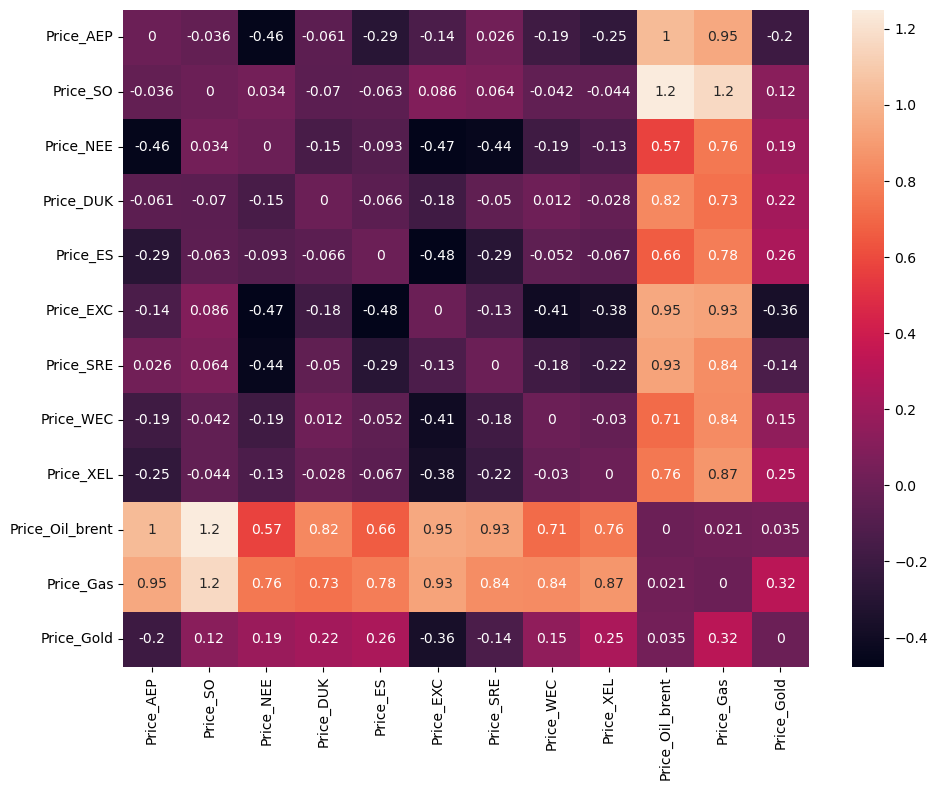

In [304]:
cond1 = (df.index <= '2019')
cond2 = (df.index > '2019')
heat_map = df[securities][cond2].corr() - df[securities][cond1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(heat_map, annot=True)
plt.tight_layout()
plt.show()

#### Заметно "углубление" отрицательной корреляции нефти и газа с остальными активами.

## Следующий шаг – создание новых переменных

#### Мы уже создавали новую переменную "Price_index" для анализа и выполнения EDA. 

#### Создадим переменную эластичности индикативной цены по цене нефти. Данный значение будет нам показывать предельную зависимость цен данных эндогенных переменных друг от друга. Она обладает прогнозным свойством, посколько показывает потенциал дифференциала цен в зависимости от дифференциала нефти.

In [305]:
df_diff['Elastic_Price_ind-Oil'] = df_diff['Price_index'] / df_diff['Price_Oil_brent'] 

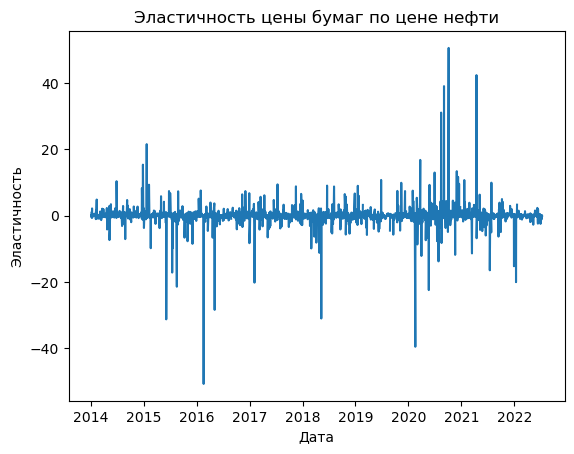

In [306]:
plt.plot(df_diff['Elastic_Price_ind-Oil'])
plt.xlabel('Дата')
plt.ylabel('Эластичность')
plt.title('Эластичность цены бумаг по цене нефти')
plt.show()

## Следующий шаг – Гипотезы 

### Гипотеза 1: Математическое ожидание изменения цен газа равно 0.

$$
H_0 : μ = 0 
$$

$$
H_1 : μ ≠ 0
$$


In [307]:
alpha = 0.05
diff = df_diff['Price_Gas'].mean()
diff_std = np.sqrt(df_diff['Price_Gas'].var(ddof=1) / df_diff['Price_Gas'].size)
z_obs = diff / diff_std

z_crit = sts.norm.ppf(1 - alpha / 2)

if abs(z_obs) < z_crit:
    
    print('Нет оснований отвергать основную гипотезу.')
else:
    print('Основная гипотеза отвергается.')

Нет оснований отвергать основную гипотезу.


### Гипотеза 2: Матожидание разности корреляционных пар (Золото - Газ, Золото - Индикативная цена) равно 0.

In [308]:
gg = corr_coefs_gold['Gold-Gas']
gp = corr_coefs_gold['Gold-Price_ind']
mean = np.mean(gg + gp) 
n = len(gg + gp)
l = mean - sts.norm.ppf(0.95) * np.std(gg + gp) / np.sqrt(n)
r = mean + sts.norm.ppf(0.95) * np.std(gg + gp) / np.sqrt(n)
if 0 > l and 0 < r:
    print('Нет оснований отвергать основную гипотезу.')
else:
    print('Отвергаем основную гипотезу.')

Отвергаем основную гипотезу.


## Машинное обучение

### Через корреляцию индикативной цены и цены газа можно прогназировать направление значения корреляции пары Индикативная цена – Нефть. Постараемся сделать модель и посчитаем ошибки.

In [309]:
from sklearn.linear_model import LinearRegression

Предположим лаг в один год. То есть мы хотим получить модель, которая нам позволит сегодня посчитать корреляцию индикативной цены и цены газа и предположить корреляцию нефти и индикативной цены. Год был выбран путем глубинного зрительного анализа графика)

In [310]:
model = LinearRegression()
model.fit(np.array(corr_coefs['Oil-Gas'][:-365]).reshape(-1, 1) , np.array(corr_coefs['Gas-Price_ind'][365:]).reshape(-1, 1))
print(f' Модель имеет вид: Gas-Price_ind in one year = {model.coef_[0][0]} * Oil-Gas today {model.intercept_[0]}')

 Модель имеет вид: Gas-Price_ind in one year = 0.5376423366653693 * Oil-Gas today -0.07644245623372412


Нужно теперь оценить модель. В качестве метрики выбираем MAPE, так как мы работаем с отнормированными данными (корреляция) и нам не так опасны выбросы.

6.3385518500595355


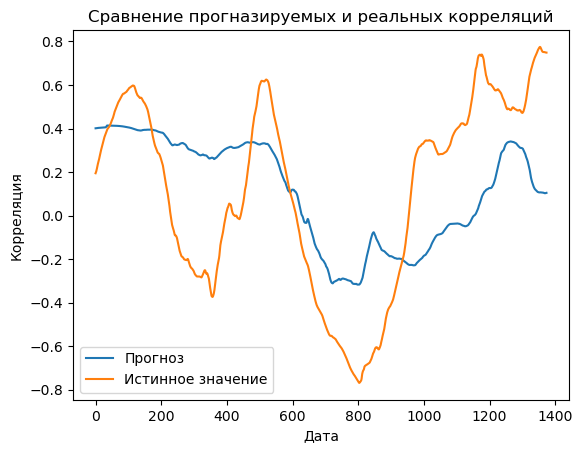

In [311]:
from sklearn.metrics import mean_absolute_percentage_error

def MAPE(arr1, arr2):
    return mean_absolute_percentage_error(arr1, arr2)

pred = model.predict(np.array((corr_coefs['Oil-Gas'][:-365])).reshape(-1, 1))

print(MAPE(pred, np.array(corr_coefs['Gas-Price_ind'][365:]).reshape(-1, 1)))

plt.plot(pred, label='Прогноз')
plt.plot(np.array(corr_coefs['Gas-Price_ind'][365:]).reshape(-1, 1), label='Истинное значение')
plt.legend()
plt.ylabel('Корреляция')
plt.xlabel('Дата')
plt.title('Сравнение прогназируемых и реальных корреляций')
plt.show()

Очевидно, что не хватает данных. Попробуем добавить наблюдения через PolynomialFeatures. Кроме того, разобьем на тренировочную и тестовую выборки.

In [312]:
from sklearn.model_selection import train_test_split
lenn = len(np.array((corr_coefs['Oil-Gas'][:-365])).reshape(-1, 1)) // 2 # разобьем примерно пополам
x_train, x_test  = np.array((corr_coefs['Oil-Gas'][:-365])).reshape(-1, 1)[:lenn], np.array((corr_coefs['Oil-Gas'])).reshape(-1, 1)[:lenn]
y_train, y_test  = np.array((corr_coefs['Gas-Price_ind'][:-365])).reshape(-1, 1)[:lenn], np.array((corr_coefs['Gas-Price_ind'])).reshape(-1, 1)[:lenn] 

 Модель имеет вид: Gas-Price_ind in one year = 2.451996836950702 * Oil-Gas today + -0.19132503281292693
 MAPE = 86.50814099871238


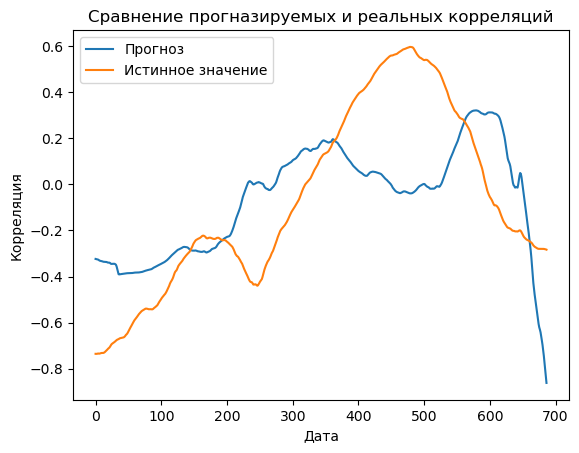

In [313]:
from sklearn.preprocessing import PolynomialFeatures

polinom_transform = PolynomialFeatures(2, include_bias=False)

oil_gas_poly = polinom_transform.fit_transform(x_train)
Gas_Price_ind_poly = polinom_transform.transform(y_train)

model = LinearRegression()
model.fit(oil_gas_poly , Gas_Price_ind_poly)

print(f' Модель имеет вид: Gas-Price_ind in one year = {model.coef_[0][0]} * Oil-Gas today + {model.intercept_[0]}')

oil_gas_poly_test = polinom_transform.transform(x_test)
Gas_Price_ind_poly_test = polinom_transform.transform(y_test)


pred = model.predict(oil_gas_poly_test)


print(f' MAPE = {MAPE(pred, Gas_Price_ind_poly)}')

plt.plot(pred[::,:1 :], label='Прогноз')
plt.plot(Gas_Price_ind_poly_test[::,:1 :], label='Истинное значение')
plt.legend()
plt.ylabel('Корреляция')
plt.xlabel('Дата')
plt.title('Сравнение прогназируемых и реальных корреляций')
plt.show()



Полученная модель имеет большую погрешность и неточность. Попробуем оптимизировать по MAPE, переопределяя лаг.

In [314]:
MAPE_min = [999, 0] # просто фиксируем высокий MAPE

for i in range(1, 1460, 10):
    model = LinearRegression()
    model.fit(np.array(corr_coefs['Oil-Gas'][:-i]).reshape(-1, 1) , np.array(corr_coefs['Gas-Price_ind'][i:]).reshape(-1, 1))
    pred = model.predict(np.array((corr_coefs['Oil-Gas'][:-i])).reshape(-1, 1))
    
    if MAPE_min[0] >  MAPE(pred, np.array(corr_coefs['Gas-Price_ind'][i:]).reshape(-1, 1)):
        MAPE_min[0] = MAPE(pred, np.array(corr_coefs['Gas-Price_ind'][i:]).reshape(-1, 1))
        MAPE_min[1] = i

In [315]:
print(f'При лаге в {MAPE_min[1]} дней мы имеем MAPE={MAPE_min[0]}')

При лаге в 1451 дней мы имеем MAPE=0.15452361765159875


Стоит отметить, что лаг получился довольно высоким.

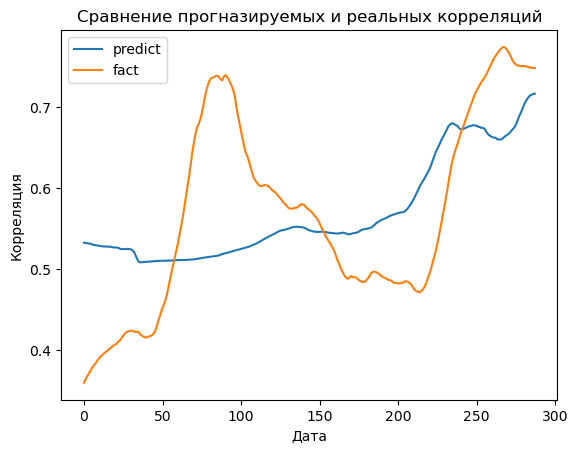

In [316]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred = model.predict(np.array((corr_coefs['Oil-Gas'][:-MAPE_min[1]])).reshape(-1, 1))

plt.plot(pred, label='predict')
plt.ylabel('Корреляция')
plt.xlabel('Дата')
plt.title('Сравнение прогназируемых и реальных корреляций')
plt.plot(np.array(corr_coefs['Gas-Price_ind'][MAPE_min[1]:]).reshape(-1, 1), label='fact')
plt.legend()
plt.show()

Попробуем добавить PolynomialFeatures.

In [317]:
from sklearn.model_selection import train_test_split
lenn = len(np.array((corr_coefs['Oil-Gas'][:-MAPE_min[1]])).reshape(-1, 1)) // 2
x_train, x_test  = np.array((corr_coefs['Oil-Gas'][:MAPE_min[1]])).reshape(-1, 1)[:lenn], np.array((corr_coefs['Oil-Gas'])).reshape(-1, 1)[:lenn]
y_train, y_test  = np.array((corr_coefs['Gas-Price_ind'][:-MAPE_min[1]])).reshape(-1, 1)[:lenn], np.array((corr_coefs['Gas-Price_ind'])).reshape(-1, 1)[:lenn] 

 Модель имеет вид: Gas-Price_ind in one year = -569.188658785855 * Oil-Gas today + 255.90610682474664
 MAPE = 0.2070056095626578


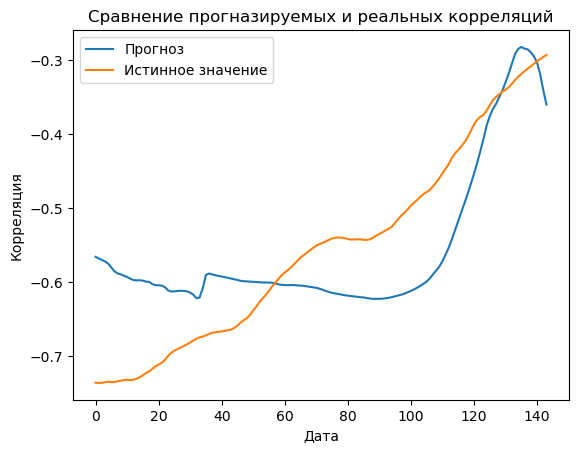

In [318]:
from sklearn.preprocessing import PolynomialFeatures

polinom_transform = PolynomialFeatures(2, include_bias=False)

oil_gas_poly = polinom_transform.fit_transform(x_train)
Gas_Price_ind_poly = polinom_transform.transform(y_train)

model = LinearRegression()
model.fit(oil_gas_poly , Gas_Price_ind_poly)
print(f' Модель имеет вид: Gas-Price_ind in one year = {model.coef_[0][0]} * Oil-Gas today + {model.intercept_[0]}')

oil_gas_poly_test = polinom_transform.transform(x_test)
Gas_Price_ind_poly_test = polinom_transform.transform(y_test)


pred = model.predict(oil_gas_poly_test)


print(f' MAPE = {MAPE(pred, Gas_Price_ind_poly)}')

plt.plot(pred[::,:1 :], label='Прогноз')
plt.plot(Gas_Price_ind_poly_test[::,:1 :], label='Истинное значение')
plt.legend()
plt.ylabel('Корреляция')
plt.xlabel('Дата')
plt.title('Сравнение прогназируемых и реальных корреляций')
plt.show()



Модель получилась не такой плохой, но её проблема в том, что с таким лагом, минимизирующем MAPE мы имеем слишком малое количество наблюдений. Модель получилось неадекватной в имеющихся условиях.